# Video Games Sales Data

This dataset contains records of popular video games in North America, Japan, Europe and other parts of the world. Every video game in this dataset has at least 100k global sales.

Not sure where to begin? Scroll to the bottom to find challenges!

In [12]:
suppressPackageStartupMessages(library(tidyverse))

read_csv('data/vgsales.csv.gz', show_col_types = FALSE)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


## Data Dictionary

| Column        | Explanation                                                                   |
| ------------- | ----------------------------------------------------------------------------- |
| Rank          | Ranking of overall sales                                                      |
| Name          | Name of the game                                                              |
| Platform      | Platform of the games release (i.e. PC,PS4, etc.)                             |
| Year          | Year the game was released in                                                 |
| Genre         | Genre of the game                                                             |
| Publisher     | Publisher of the game                                                         |
| NA_Sales      | Number of sales in North America (in millions)                                |
| EU_Sales      | Number of sales in Europe (in millions)                                       |
| JP_Sales      | Number of sales in Japan (in millions)                                        |
| Other_Sales   | Number of sales in other parts of the world (in millions)                     |
| Global_Sales  | Number of total sales (in millions)                                           |

[Source](https://www.kaggle.com/gregorut/videogamesales) of dataset.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?
- 📊 **Visualize**: Create a plot visualizing the average sales for games in the most popular three genres. Differentiate between NA, EU, and global sales.
- 🔎 **Analyze**: Are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working as a data analyst for a video game retailer based in Japan. The retailer typically orders games based on sales in North America and Europe, as the games are often released later in Japan. However, they have found that North American and European sales are not always a perfect predictor of how a game will sell in Japan.

Your manager has asked you to develop a model that can predict the sales in Japan using sales in North America and Europe and other attributes such as the name of the game, the platform, the genre, and the publisher.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

## Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?

In [13]:
Game_Sales_Data <- read.csv('data/vgsales.csv.gz')

In [14]:
Game_Sales_Data %>%
	group_by(Platform) %>%
	summarise(Global_Sales = sum(Global_Sales)) %>%
	filter(Platform == "Wii" | Platform == "X360" | Platform == "PS3") %>%
	arrange(desc(Global_Sales))

Platform,Global_Sales
<chr>,<dbl>
X360,979.96
PS3,957.84
Wii,926.71


## Create a plot visualizing the average sales for games in the most popular three genres. Differentiate between NA, EU, and global sales.

In [15]:
Game_Sales_Data %>%
	group_by(Genre) %>%
	summarize(count = n()) %>%
	arrange(desc(count)) %>%
	slice(1:3)

Genre,count
<chr>,<int>
Action,3316
Sports,2346
Misc,1739


In [16]:
Global_Genre_Sales <- Game_Sales_Data %>%
	group_by(Genre) %>%
	filter(Genre == "Action" | Genre == "Sports" | Genre == "Misc") %>%
	summarise(Global_Genre_Sales = mean(Global_Sales)) %>%
	arrange(desc(Global_Genre_Sales))

Global_Genre_Sales

Genre,Global_Genre_Sales
<chr>,<dbl>
Sports,0.5673188
Action,0.5281001
Misc,0.4657619


As we can see, the number of Misc genre games are produced more than shooters. The Shooter genre nets the third most sales globally.

In [17]:
NA_Genre_Sales <- Game_Sales_Data %>%
	group_by(Genre) %>%
	filter(Genre == "Action" | Genre == "Sports" | Genre == "Misc") %>%
	summarise(NA_Genre_Sales = mean(NA_Sales)) %>%
	arrange(desc(NA_Genre_Sales))

NA_Genre_Sales

Genre,NA_Genre_Sales
<chr>,<dbl>
Sports,0.2912830
Action,0.2647256
Misc,0.2359057


In [18]:
EU_Genre_Sales <- Game_Sales_Data %>%
	group_by(Genre) %>%
	filter(Genre == "Action" | Genre == "Sports" | Genre == "Misc") %>%
	summarise(EU_Genre_Sales = mean(EU_Sales)) %>%
	arrange(desc(EU_Genre_Sales))

EU_Genre_Sales

Genre,EU_Genre_Sales
<chr>,<dbl>
Sports,0.1606351
Action,0.1583233
Misc,0.1241978


What is interesting is that we can see that in terms of total sales that both the NA and EU market have Action, Sports, and Shooter as the most selling genre.

In [19]:
Avg_Genre_Sales <- Global_Genre_Sales %>%
	inner_join(NA_Genre_Sales, by = "Genre") %>%
	inner_join(EU_Genre_Sales, by = "Genre") %>%
	pivot_longer(-Genre, names_to = "Region", values_to = "Avg_Sales")

Avg_Genre_Sales

Genre,Region,Avg_Sales
<chr>,<chr>,<dbl>
Sports,Global_Genre_Sales,0.5673188
Sports,NA_Genre_Sales,0.2912830
Sports,EU_Genre_Sales,0.1606351
Action,Global_Genre_Sales,0.5281001
Action,NA_Genre_Sales,0.2647256
Action,EU_Genre_Sales,0.1583233
Misc,Global_Genre_Sales,0.4657619
Misc,NA_Genre_Sales,0.2359057
Misc,EU_Genre_Sales,0.1241978


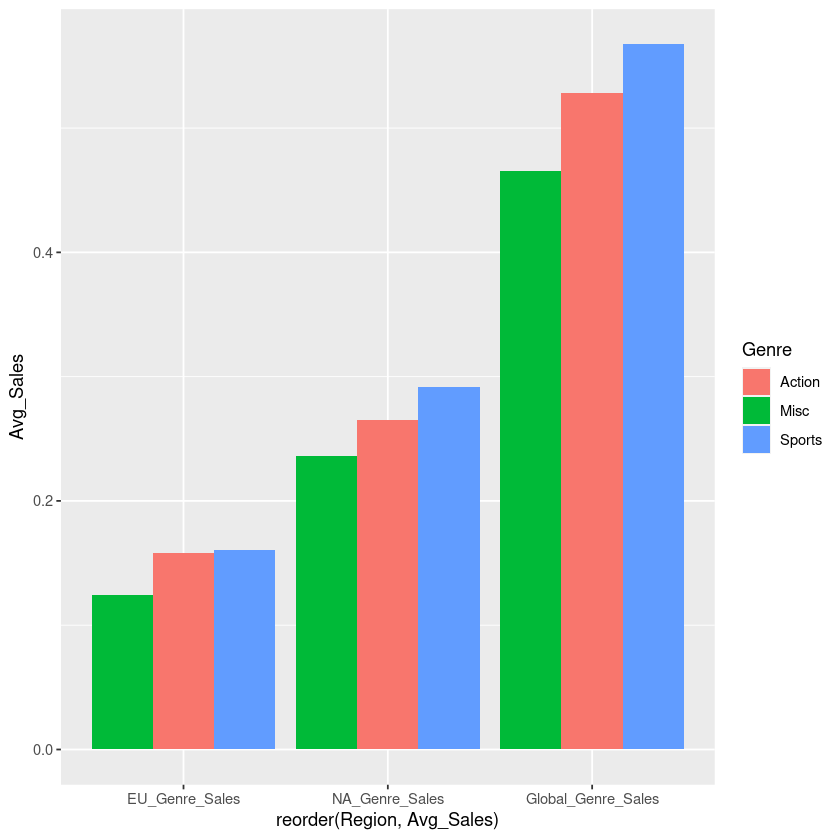

In [20]:
Avg_Genre_Sales %>%
	ggplot(aes(reorder(Region, Avg_Sales), Avg_Sales, fill = Genre, group = Avg_Sales))+
	geom_bar(stat = "identity", position = "dodge")

## Are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones?

In [21]:
Game_Sales_Data %>%
	group_by(Genre) %>%
	summarise(Sum_JP_Sales = sum(JP_Sales)) %>%
	arrange(desc(Sum_JP_Sales))
	

Genre,Sum_JP_Sales
<chr>,<dbl>
Role-Playing,352.31
Action,159.95
Sports,135.37
Platform,130.77
Misc,107.76
Fighting,87.35
Simulation,63.70
Puzzle,57.31
Racing,56.69
